#### 转化为灰度图，输出到原路径下

In [2]:
import cv2
import os

# read image
img_path = r'.\testData\1.png'

# get folder
folder_path = os.path.split(img_path)[0]

# generate new image name and path
img_gray_path = os.path.splitext(img_path)[0] + '-gray' + os.path.splitext(img_path)[-1]

# rgb to gray
img = cv2.imread(img_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# display gray image in new window
# cv2.imshow('img_gray', img_gray)
# cv2.waitKey()

# save image and open folder
cv2.imwrite(img_gray_path, img_gray)
os.startfile(folder_path)

#### 压缩为webp格式，输出到原路径下

In [ ]:
import os
from PIL import Image

def img_zip_webp(image_path):
    file_path = os.path.split(image_path)[0]
    file_name = os.path.split(image_path)[1].split('.')[0]
    output_path = file_path + '\\' + file_name + '.webp'
    im = Image.open(image_path)
    im.thumbnail((1200,900), Image.LANCZOS)
    im.save(output_path)
    print(output_path)

def img_zip_webp_all(folder_path):
    for (dir_path, dir_name, dir_file) in os.walk(folder_path):
        for index in dir_file:
            img_zip_webp(dir_path + '\\' + index)
    print('done')

In [ ]:
# for instance:
img_zip_webp_all(r'.\testData')

#### 图片拼接
_paste()_

In [11]:
from PIL import Image, ImageEnhance

im = Image.open(r'.\testData\4.png')
width, height = im.size
new_w = width // 10
new_h = height // 10
im = im.resize((new_w, new_h))

curr_bri = ImageEnhance.Contrast(im)
im_1 = curr_bri.enhance(0)
im_2 = curr_bri.enhance(0.5)
im_3 = curr_bri.enhance(1)
im_4 = curr_bri.enhance(2.5)
im_res = Image.new('RGB', (new_w*4, new_h), (255, 255, 255))
im_res.paste(im_1, (new_w * 0, 0))
im_res.paste(im_2, (new_w * 1, 0))
im_res.paste(im_3, (new_w * 2, 0))
im_res.paste(im_4, (new_w * 3, 0))

im_res.show()

#### RGB三通道颜色分布直方图

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def show_histogram(image_path):
    im = Image.open(image_path)
    r, g, b = im.split()
    len(r.histogram()) # 256
    r.histogram()
    x = np.arange(0, 256, 1)
    y1 = r.histogram()
    y2 = g.histogram()
    y3 = b.histogram()
    plt.plot(x, y1, label='red', color='red')
    plt.plot(x, y2, label='green', color='green')
    plt.plot(x, y3, label='blue', color='blue')
    plt.show()

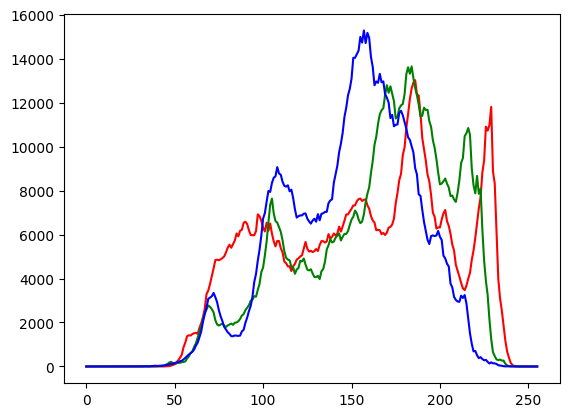

In [4]:
# for instance:
show_histogram(r'.\testData\2.png')

#### 添加水印

In [17]:
from PIL import Image, ImageDraw, ImageFont

im = Image.open(r'.\testData\1.png')
draw = ImageDraw.Draw(im)
text = 'Water Mark'
font = ImageFont.truetype(r'.\testData\A Bit Empty.ttf', 50)
draw.text((20, 20), text, 'salmon', font)
im.show()

In [ ]:
# 颜色拾取 - 从剪切板中读取图像，输出颜色平均值，并将结果复制到剪切板

In [ ]:
# 视频转换为gif